In [1]:
# Import frameworks
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data_frame = pd.read_csv("livestock_sample_data copy 2.csv",sep='\t')

In [12]:
data_frame.isnull().sum()

DATE         0
TOTAL        0
NSW_TOTAL    0
VIC_TOTAL    0
QLD_TOTAL    0
SA_TOTAL     0
WA_TOTAL     0
TAS_TOTAL    0
NT_TOTAL     8
dtype: int64

In [13]:
data_frame.duplicated().sum()

np.int64(0)

In [14]:
data_frame = data_frame.drop_duplicates()
data_frame.duplicated().sum()

np.int64(0)

In [16]:
data_frame['NT_TOTAL'].unique()

array([ nan, 28.5, 18. ,  6.9, 19.4, 34. , 25.6, 10.9, 32.9, 49.4, 27.2,
        4. , 28.4, 36.1, 16.3,  4.2, 29.4, 43.2, 21.2,  3.2, 19.7, 45.7,
       20.2,  4.5, 23.1, 29.3, 16. ,  5. , 15.9, 25.4, 15.4, 19.1, 30.2,
       17.7,  3.1, 17.5, 35.7, 19.5,  3.3, 17. , 40.4, 16.7,  2.9, 14.8,
       29.7, 17.9,  3.4, 21.9, 25.9, 14. ,  1.7, 14.6, 25.7,  6.5,  2.2,
       18.4, 21.6,  5.2,  2.1,  6.7,  2.4,  0.5,  4.3,  5.3,  0.2,  9. ,
        0.6,  3. ,  2.7,  5.5,  8.7,  0.3,  9.4,  2. ,  2.6,  5.9,  1.6,
        1.3,  3.5,  0.4,  0. ])

using this image you can see that the data for NT has outliers and missing values so it needs to be dropped 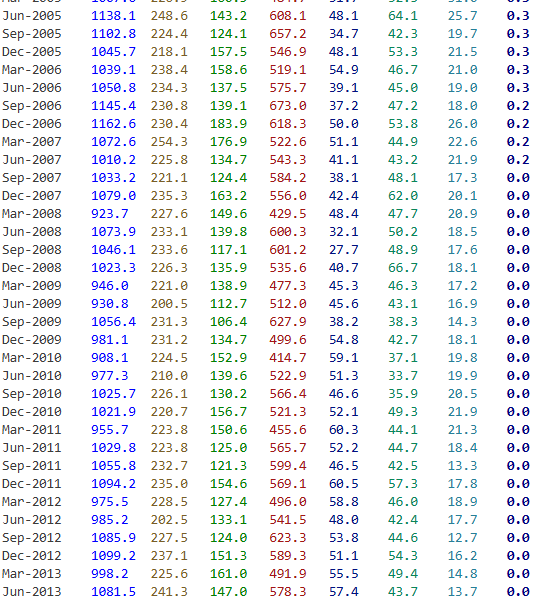

In [17]:
scale_feature = 'NT_TOTAL'

#the minimum value with space for outliers
MIN_NT_TOTAL = 14

#the maximum value with space for outliers
MAX_NT_TOTAL = 30

#scale features
data_frame[scale_feature] = [(X - MIN_NT_TOTAL) / (MAX_NT_TOTAL - MIN_NT_TOTAL) for X in data_frame[scale_feature]]

data_frame.describe()

,TOTAL,NSW_TOTAL,VIC_TOTAL,QLD_TOTAL,SA_TOTAL,WA_TOTAL,TAS_TOTAL,NT_TOTAL
count,194.000000,194.000000,194.00000,194.000000,194.000000,194.000000,194.000000,186.000000
mean,1006.475258,234.040722,178.14433,452.323196,50.560309,58.796392,24.036082,-0.464617
std,115.012643,48.359430,49.07422,103.713091,15.177227,20.271393,5.651543,0.680640
min,738.000000,157.600000,104.50000,158.000000,17.100000,25.300000,12.700000,-0.875000
25%,942.800000,201.775000,144.32500,386.375000,38.950000,44.750000,19.825000,-0.875000
50%,997.200000,227.800000,167.25000,452.400000,51.350000,52.150000,23.300000,-0.856250
75%,1072.900000,254.275000,200.70000,528.225000,60.500000,68.125000,27.700000,-0.446875
max,1365.400000,425.400000,357.60000,673.000000,86.800000,126.500000,43.000000,2.212500


In [22]:
data_frame = data_frame.dropna(subset='NT_TOTAL')

In [25]:
data_frame = data_frame.drop(columns='NT_TOTAL')

In [26]:
data_frame.to_csv('wrangled_data.csv', index=False)